In [100]:
import tensorflow as tf
import keras

In [101]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
model = keras.models.load_model("CreditCardFraudDetection.keras")

In [103]:
import pickle

In [104]:
with open('validation_test.pickle', 'rb') as handle:
    validation_set = pickle.load(handle)

In [105]:
validation_data = validation_set.drop(columns="is_fraud").values.astype('float32')
validation_labels = validation_set['is_fraud'].values.astype('float32')

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:

#Predict
predictions = model.predict(validation_data)


420/420 [==============================] - 2s 4ms/step


In [108]:
print(predictions)

[[0.49957514]
 [0.49957514]
 [0.49957514]
 ...
 [0.49957514]
 [0.49957514]
 [0.49957514]]


In [109]:
table = [[0,0],[0,0]]

for i in range(predictions.size):
    if predictions[i] < 0.5:
        if validation_labels[i] == 0:
            table[0][0] += 1
        else:
            table[0][1] += 1
    else:
        if validation_labels[i] == 0:
            table[1][0] += 1
        else:
            table[1][1] += 1
    
print(table)

[[5000, 8412], [0, 0]]


In [110]:

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(validation_labels, y_prediction , normalize='pred')

ValueError: Found input variables with inconsistent numbers of samples: [13412, 10000]

In [ ]:
print(result)

[[0.  0.5]
 [0.  0.5]]


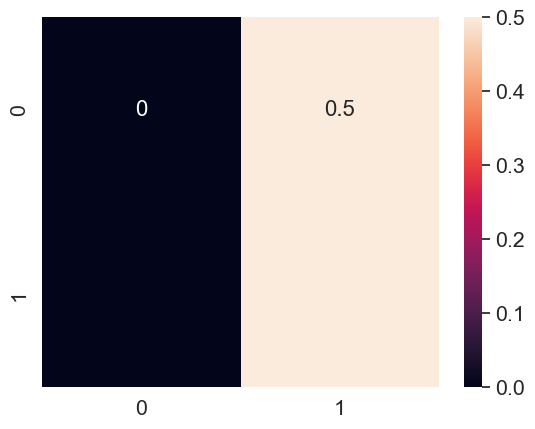

In [ ]:
sn.set(font_scale=1.4) # for label size
xaxis = ["Legit, Fraud"]
yaxis = ["Fraud, Legit"]
hm = sn.heatmap(result, annot=True, annot_kws={"size": 16}, xticklabels=xaxis, yticklabels=yaxis) # font size
hm = hm.pivot('month', 'year', 'passengers') 

plt.show()